In [1]:
library(ggplot2)
library(gcookbook)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



In [2]:
# 범주에 대해서 얼만큼의 수치를 가지고 있는지
# Bar graph
pg_mean

group,weight
ctrl,5.032
trt1,4.661
trt2,5.526


In [3]:
str(pg_mean)

'data.frame':	3 obs. of  2 variables:
 $ group : Factor w/ 3 levels "ctrl","trt1",..: 1 2 3
 $ weight: num  5.03 4.66 5.53


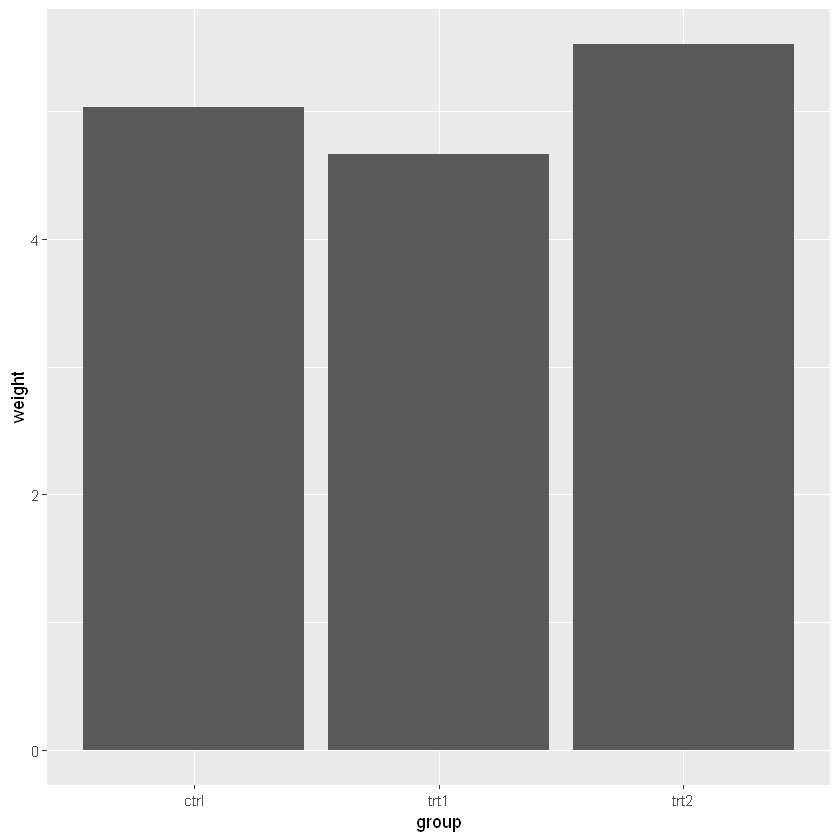

In [5]:
# geom_col()
ggplot(pg_mean, aes(x = group, y = weight)) + geom_col()

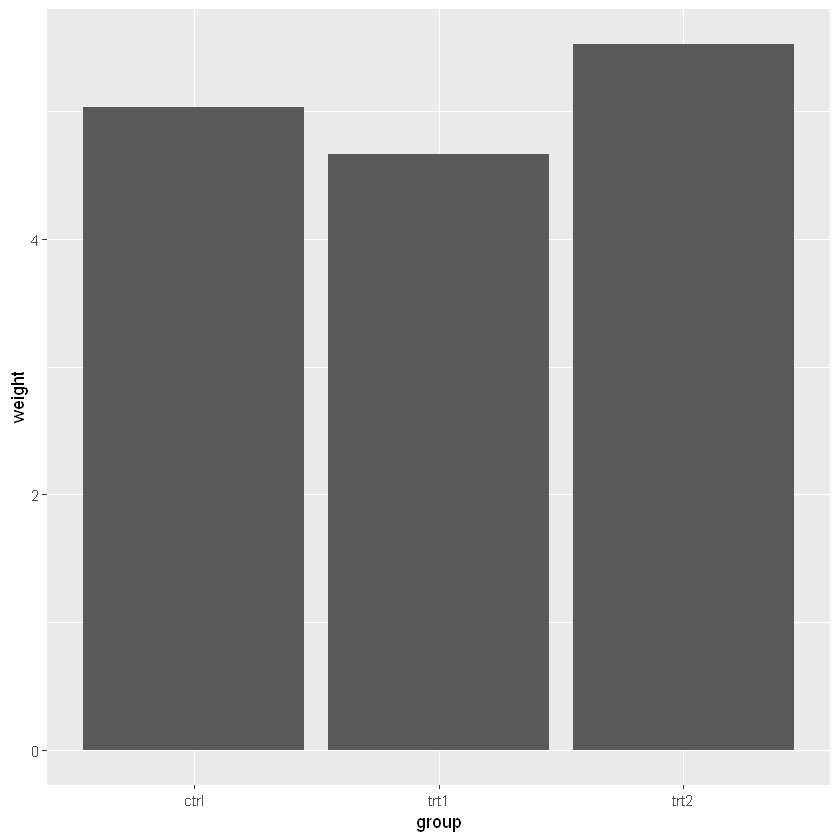

In [8]:
# geom_bar는 도수를 자체 계산하여 시각화
# 따라서 stat = identity로 y변수를 막대의 높이로 지정해줘야함(자기자신)

# geom_col은 y에 지정된 값을 시각화

ggplot(pg_mean, aes(x = group, y = weight)) + 
    geom_bar(stat = 'identity')

In [10]:
BOD

Time,demand
1,8.3
2,10.3
3,19.0
4,16.0
5,15.6
7,19.8


In [9]:
# x축이 수치형이므로
# 범주형으로 변환시켜주고 barploting
str(BOD)

'data.frame':	6 obs. of  2 variables:
 $ Time  : num  1 2 3 4 5 7
 $ demand: num  8.3 10.3 19 16 15.6 19.8
 - attr(*, "reference")= chr "A1.4, p. 270"


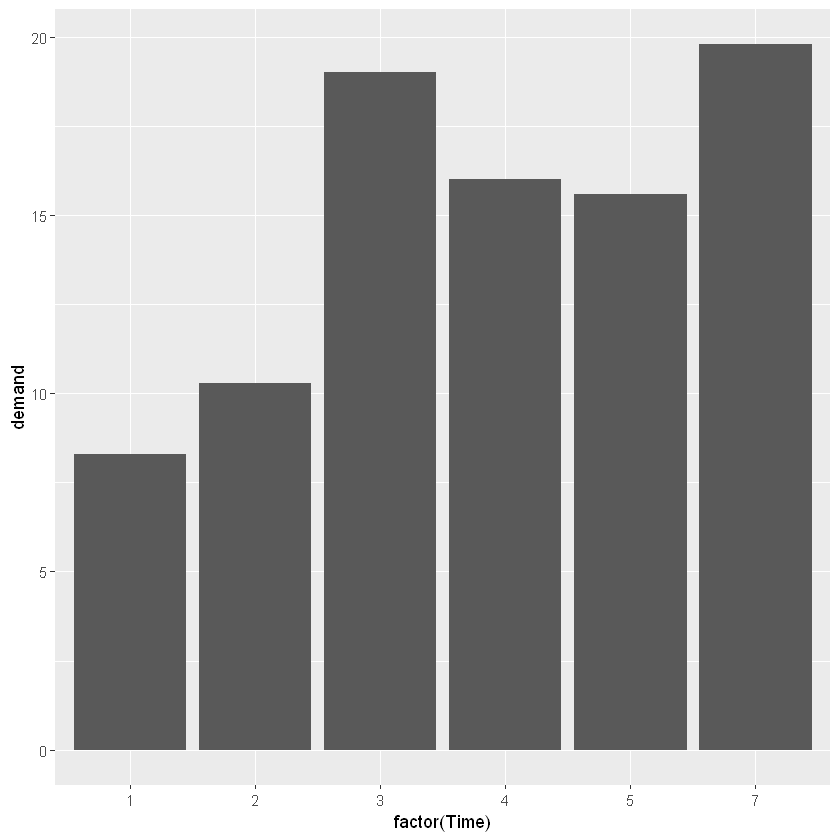

In [11]:
ggplot(BOD, aes(x = factor(Time), y = demand)) + 
    geom_col()

In [7]:
pg_mean

group,weight
ctrl,5.032
trt1,4.661
trt2,5.526


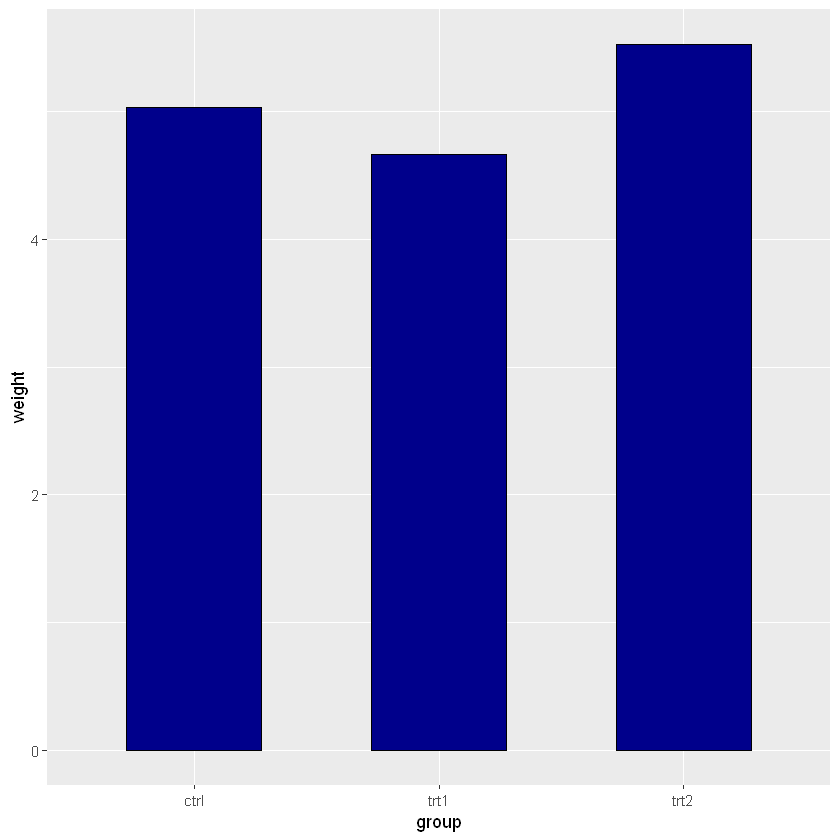

In [12]:
# ggplot의 두께 조정
ggplot(pg_mean, aes(x = group, y = weight)) + geom_col(
width = 0.55, fill = 'darkblue', color = 'black')

## group bar graph

In [15]:
cabbage_exp

Cultivar,Date,Weight,sd,n,se
c39,d16,3.18,0.9566144,10,0.30250803
c39,d20,2.80,0.2788867,10,0.08819171
c39,d21,2.74,0.9834181,10,0.31098410
c52,d16,2.26,0.4452215,10,0.14079141
c52,d20,3.11,0.7908505,10,0.25008887
c52,d21,1.47,0.2110819,10,0.06674995


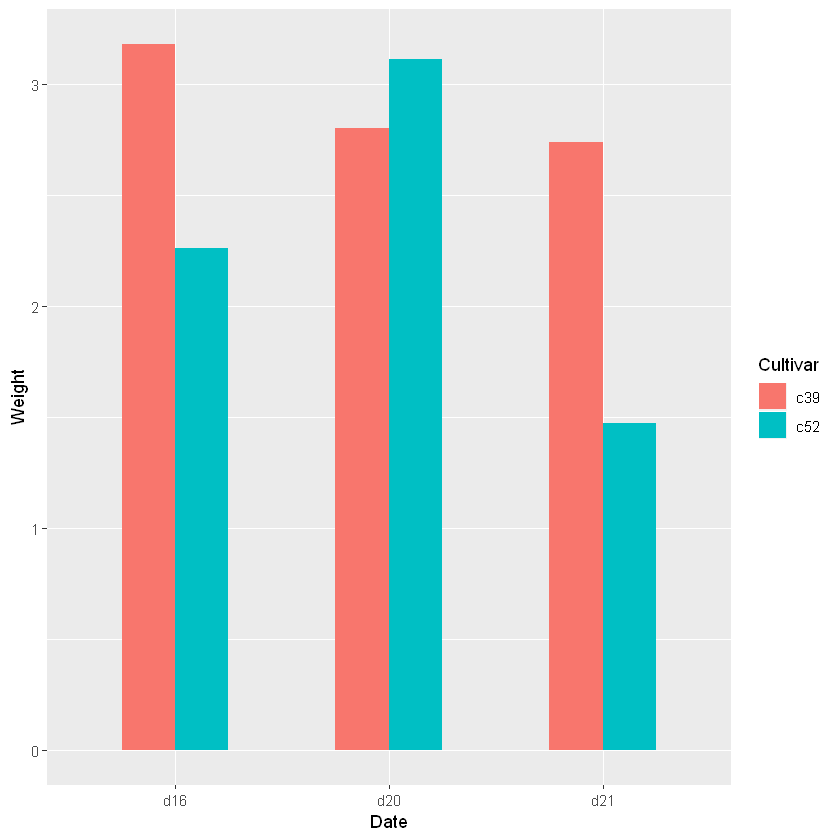

In [21]:
# x가 범주형인데, 그 안에 여러개의 그룹(범주형)으로 또 나눠지고
# y가 수치형이면 geom_col
# x값마다 count를 보고싶으면 geom_bar
# ex d16의 무게가 3.18, 2.26 두 개로 나눠져 있는데, 
# date 안에 또 범주형 Cultivar로 나눠져 있으니깐, 각각 그린다
ggplot(cabbage_exp, aes(x = Date, y = Weight,
                       fill = Cultivar)) + geom_col(width = 0.5, position = 'dodge')

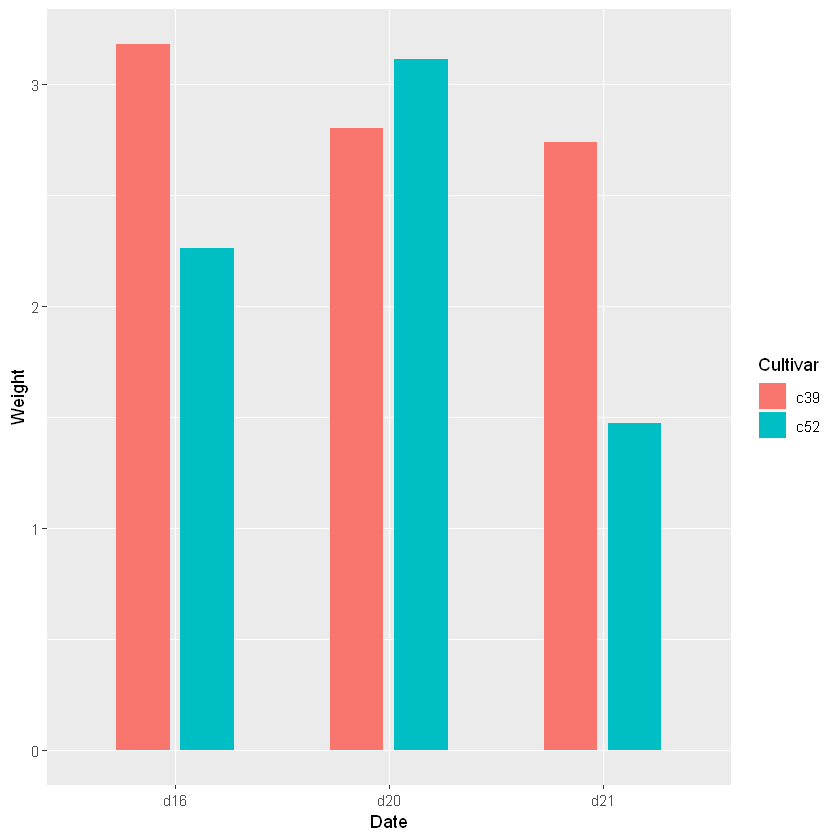

In [27]:
ggplot(cabbage_exp, aes(x = Date, y = Weight,
                       fill = Cultivar)) + geom_col(width = 0.5,
                                                   position = position_dodge(0.6))

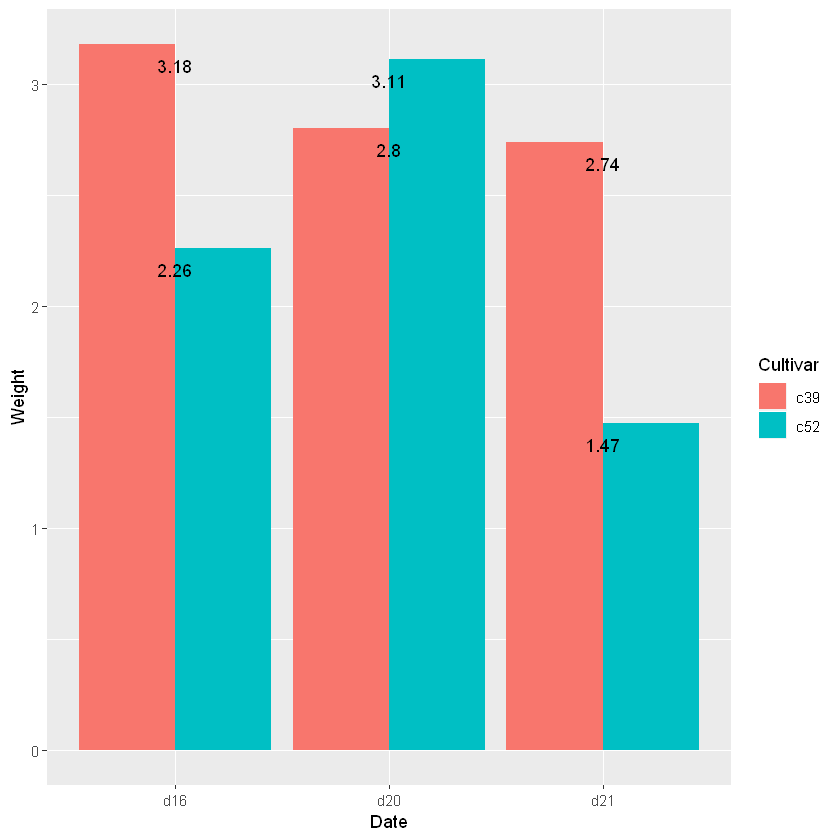

In [97]:
### label
ggplot(cabbage_exp, aes(x = Date, y = Weight, fill  = Cultivar)) + geom_col(
position = 'dodge') + geom_text(aes(label = Weight), vjust = 2)

In [34]:
cabbage_exp

Cultivar,Date,Weight,sd,n,se
c39,d16,3.18,0.9566144,10,0.30250803
c39,d20,2.80,0.2788867,10,0.08819171
c39,d21,2.74,0.9834181,10,0.31098410
c52,d16,2.26,0.4452215,10,0.14079141
c52,d20,3.11,0.7908505,10,0.25008887
c52,d21,1.47,0.2110819,10,0.06674995


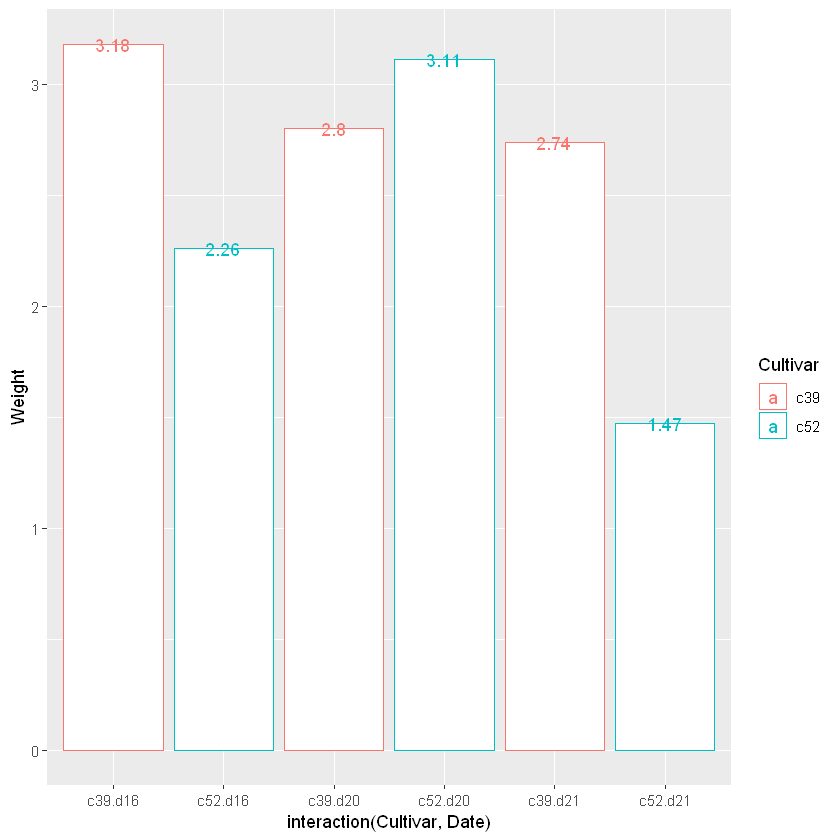

In [51]:
ggplot(cabbage_exp, aes(x = interaction(Cultivar, Date),
                       y = Weight, label = Weight, color = Cultivar)) + geom_col(fill = 'white') + geom_text()

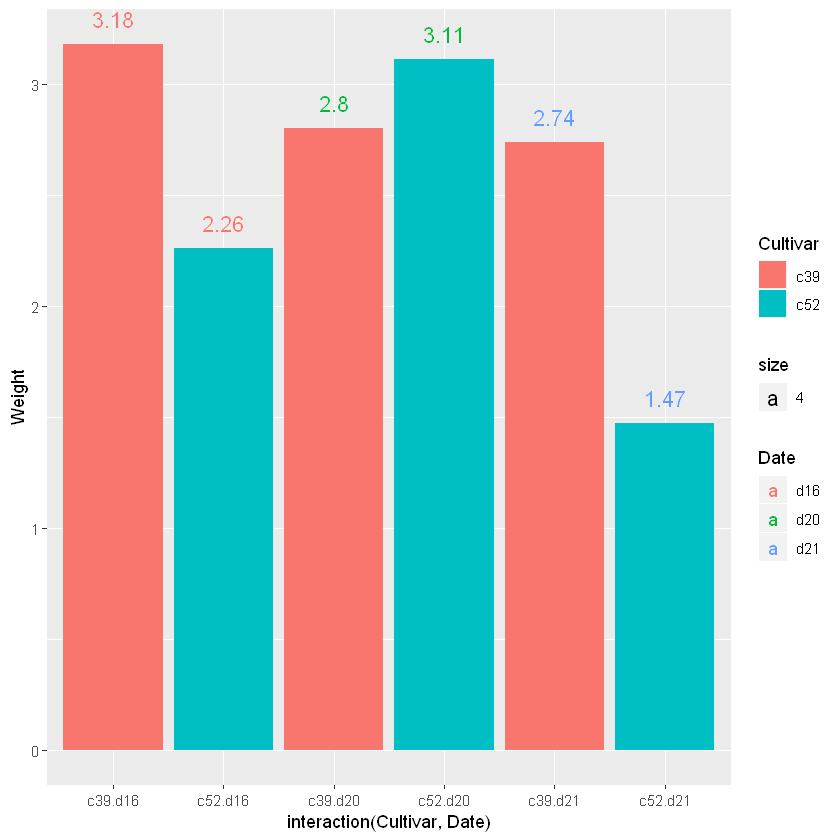

In [69]:
# 개별적인 geom 함수에 aes를 적용하면 개별 적으로 적용되고
# 공통으로 있는 ggplot 안에 aes 적용하면 공통으로 적용된다
### 매우 중요함 시험에 나옴
ggplot(cabbage_exp, aes(x = interaction(Cultivar, Date),
                       y = Weight, label = Weight)) + geom_col(aes(fill = Cultivar)) + geom_text(aes(color = Date,
                                                                                              size =4),
                                                                                                vjust = -1)

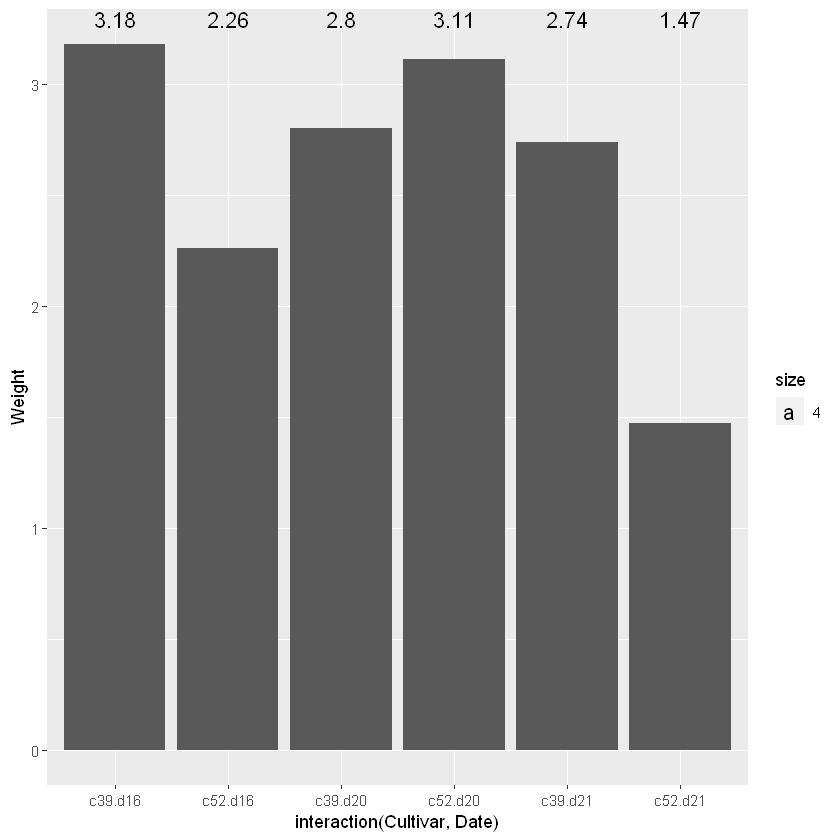

In [81]:
# geom_text 안에 y는 텍스트에만 적용되는 것
# ggplot에 적용되면 공통으로 적용되는 작동원리
ggplot(cabbage_exp, aes(x = interaction(Cultivar, Date),
                       y = Weight, label = Weight)) + geom_col() + geom_text(aes(label = Weight, y= 3.18,vjust = -1,
                                                                                size =4))

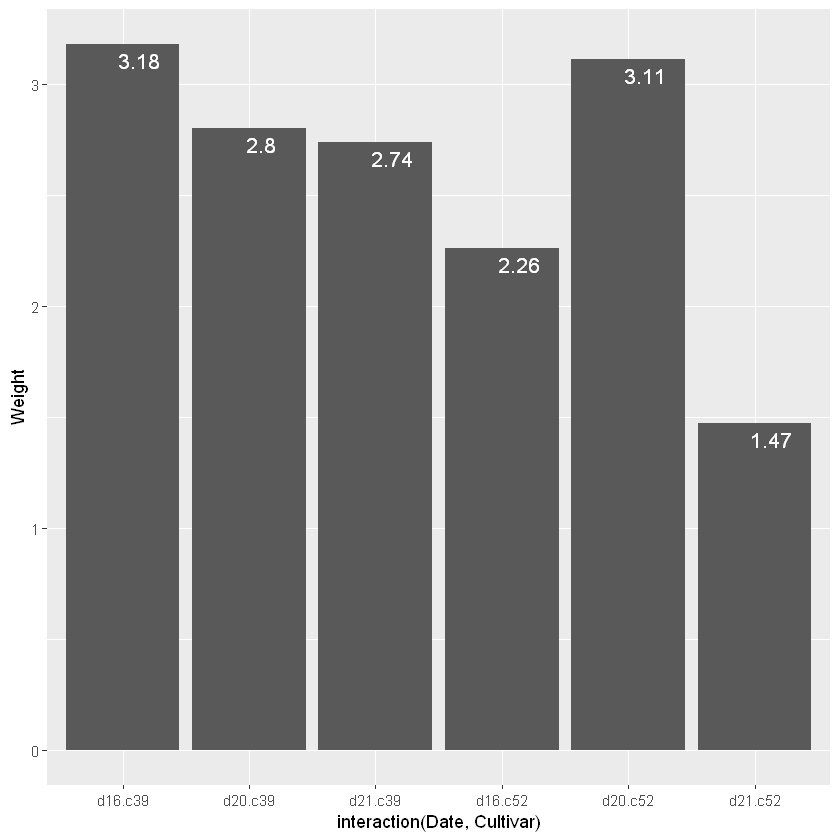

In [13]:
p <- ggplot(cabbage_exp, aes(x = interaction(Date, Cultivar), y = Weight)) + geom_col()

p + geom_text(aes(label = Weight, vjust = 1.5, hjust = 0.1), color = 'white', size = 4.44)

## 데이터 범주별로 필터링 -> 범주별로 시각화

In [15]:
head(uspopchange)

State,Abb,Region,Change
Alabama,AL,South,7.5
Alaska,AK,West,13.3
Arizona,AZ,West,24.6
Arkansas,AR,South,9.1
California,CA,West,10.0
Colorado,CO,West,16.9


In [17]:
# state와 region을 기준으로 change의 분포를 보고싶다
str(uspopchange)

'data.frame':	50 obs. of  4 variables:
 $ State : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ Abb   : chr  "AL" "AK" "AZ" "AR" ...
 $ Region: Factor w/ 4 levels "Northeast","South",..: 2 4 4 2 4 4 1 2 2 2 ...
 $ Change: num  7.5 13.3 24.6 9.1 10 16.9 4.9 14.6 17.6 18.3 ...


In [19]:
# 필터링
(data <- subset(uspopchange, rank(Change) > 40))

,State,Abb,Region,Change
3,Arizona,AZ,West,24.6
6,Colorado,CO,West,16.9
10,Florida,FL,South,17.6
11,Georgia,GA,South,18.3
13,Idaho,ID,West,21.1
29,Nevada,NV,West,35.1
34,North Carolina,NC,South,18.5
41,South Carolina,SC,South,15.3
44,Texas,TX,South,20.6
45,Utah,UT,West,23.8


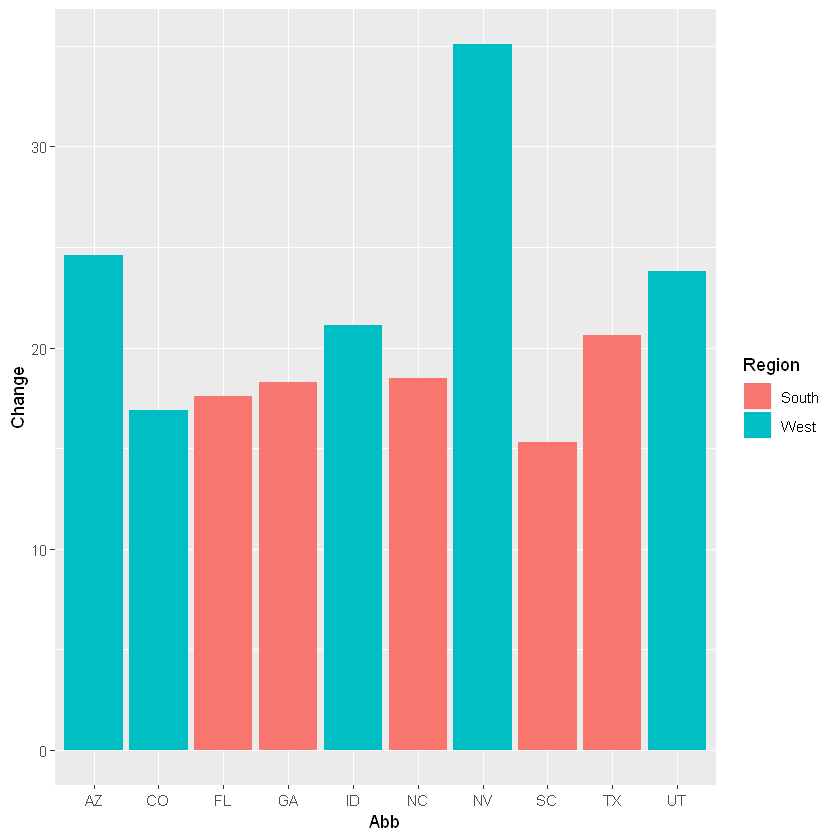

In [21]:
# x축은 지역약어로 나타내고
# y축은 change(수치)를 보여주기
# 지역으로 구분지어서
ggplot(data, aes(x = Abb, y = Change, fill = Region)) + 
    geom_col()

- 함수 str(data)는 R data 객체의 구조적 특성(자료의 개수, 변수의 개수, 각 변수명 및 자료형 등)을 보여줌.

- 함수 head(data)는 data 객체의 최초 6개 행을 나열함. tail(data)은 마지막 6개 행을 보여줌.

- 함수 subset(data, condition)은 data에서 condition을 만족하는 행을 선택하여 data frame 형태로 결과를 넘김.

- fill = Region 은 변수 Region 값에 따라 막대그래프의 색상을 표현함.


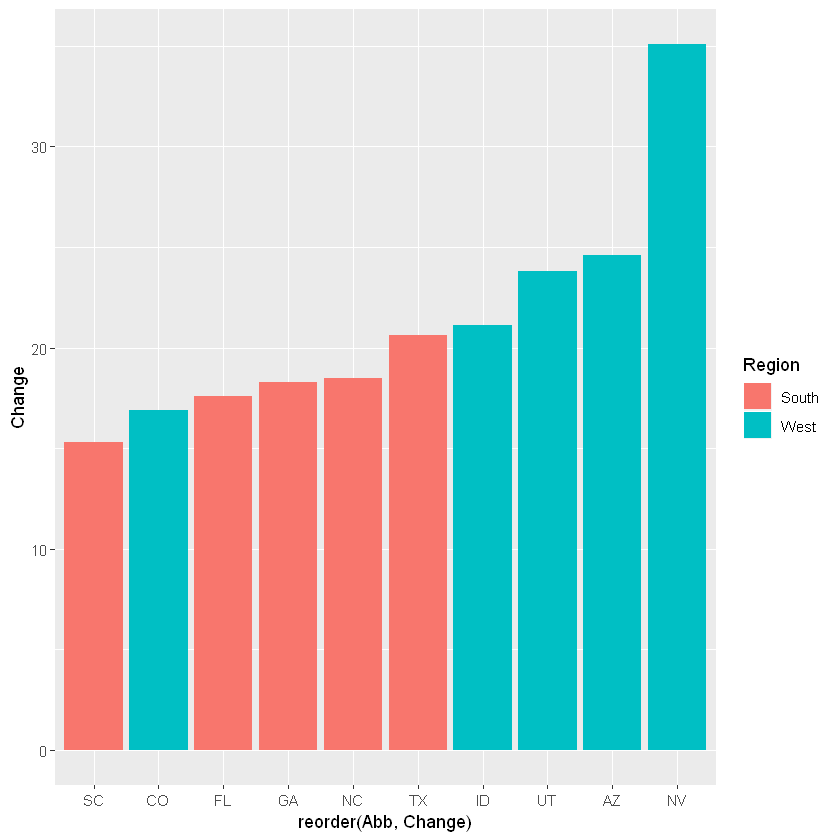

In [23]:
ggplot(data, aes(x = reorder(Abb, Change), y = Change, 
                 fill = Region)) + 
    geom_col()

In [ ]:
# aes(x = reorder(Abb, Change)
# Abb를 Change이 기준으로 sorting 하기

### Line graph

In [ ]:
BOD

Time,demand
1,8.3
2,10.3
3,19.0
4,16.0
5,15.6
7,19.8


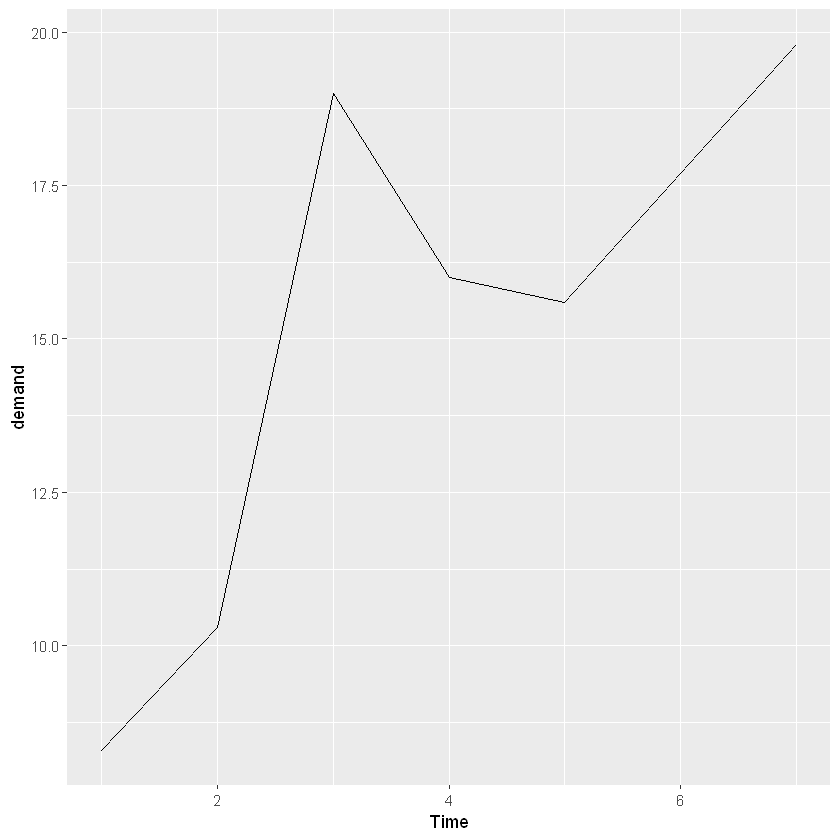

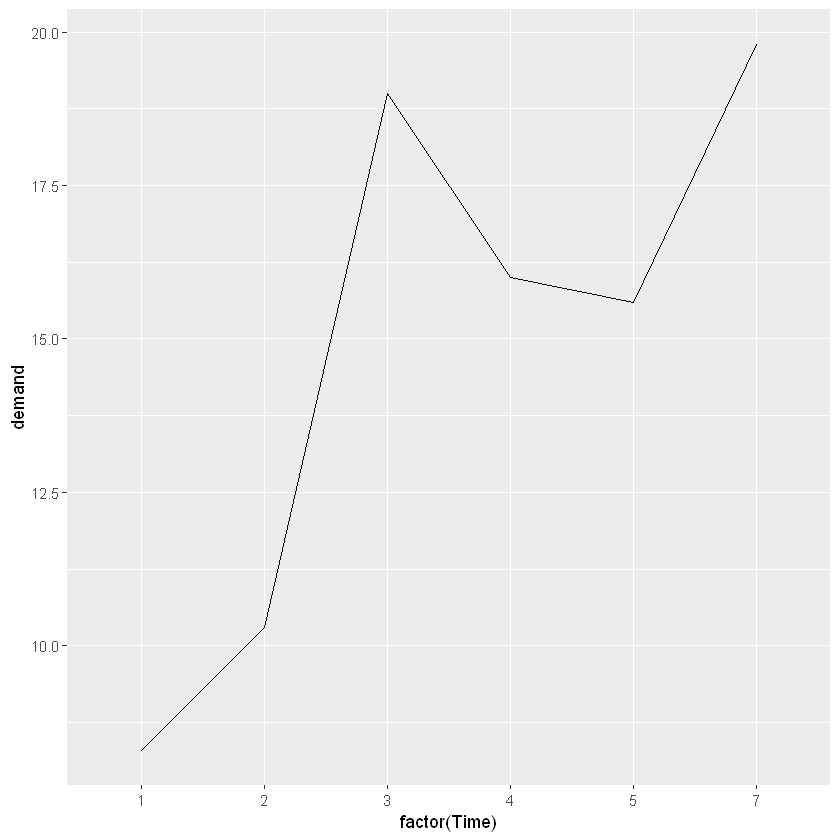

In [ ]:
# 시계열자료, x는 time 일때 line graph
ggplot(BOD, aes(x = Time, y = demand)) + geom_line()
# time을 factor로 만들면 크기가 의미가 없어서, x축의 스케일이 달라진다
# 1번 2번 3번 이런 뜻 등간격으로
# x축을 factor로 하면 그룹으로 구분된다.
# 그룹별 그림별 하나의 유닛으로 그리게 된다.
# group은 모든 자료가 aa라는 똑같은 그룹임을 의미한다
ggplot(BOD, aes(x = factor(Time), y = demand, group = 'aa')) + geom_line()

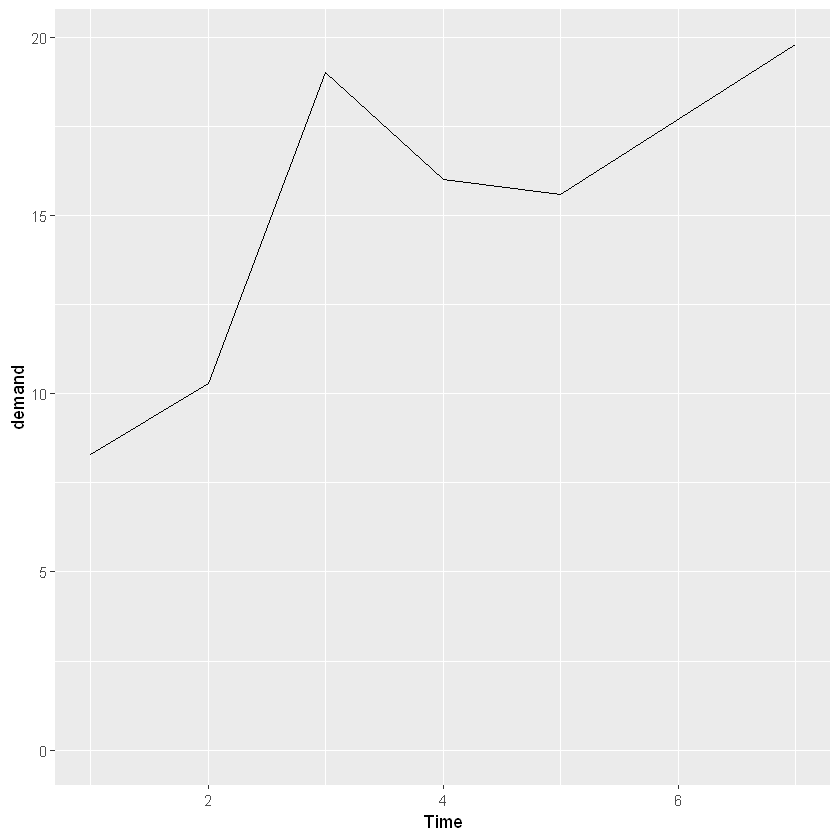

In [ ]:
ggplot(BOD, aes(x = Time, y = demand)) + geom_line() + ylim(0, max(BOD$demand))

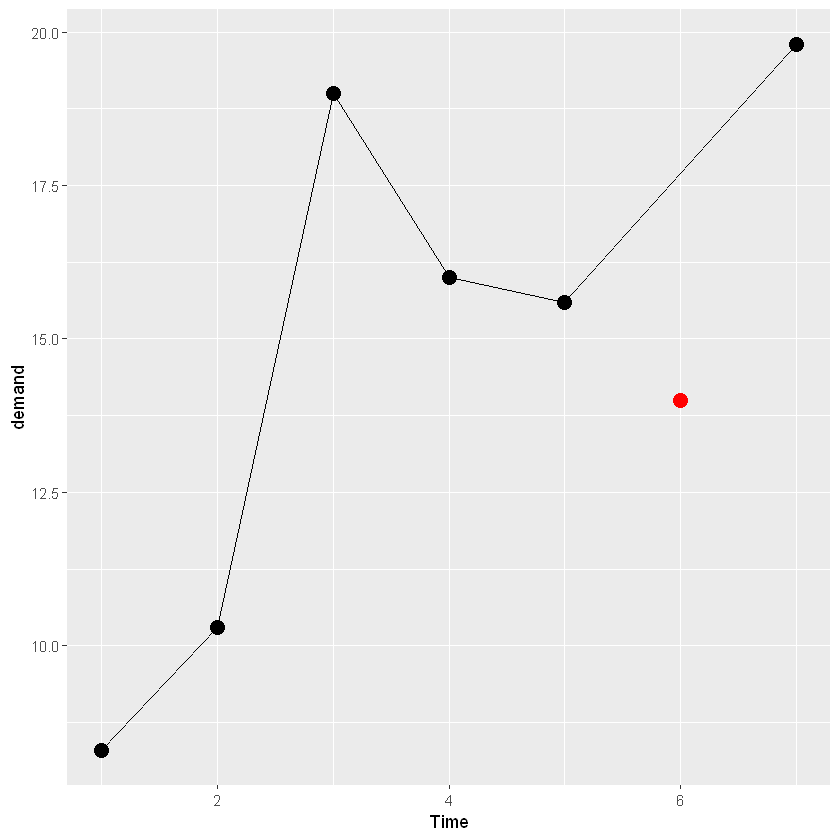

In [ ]:
# geom_line과 geom_point는 
# 앞에 공통 ggplot에서 선언된 x, y로 불러들여진다
ggplot(BOD, aes(x = Time, y = demand)) + geom_line() + geom_point(size = 4) + geom_point(x= 6, y =14, color = 'red', 
                                                                                        size = 4)

In [121]:
tail(worldpop)

,Year,Population
53,1950,2544877
54,1960,3042795
55,1970,3709837
56,1980,4460710
57,1990,5307597
58,2000,6144834


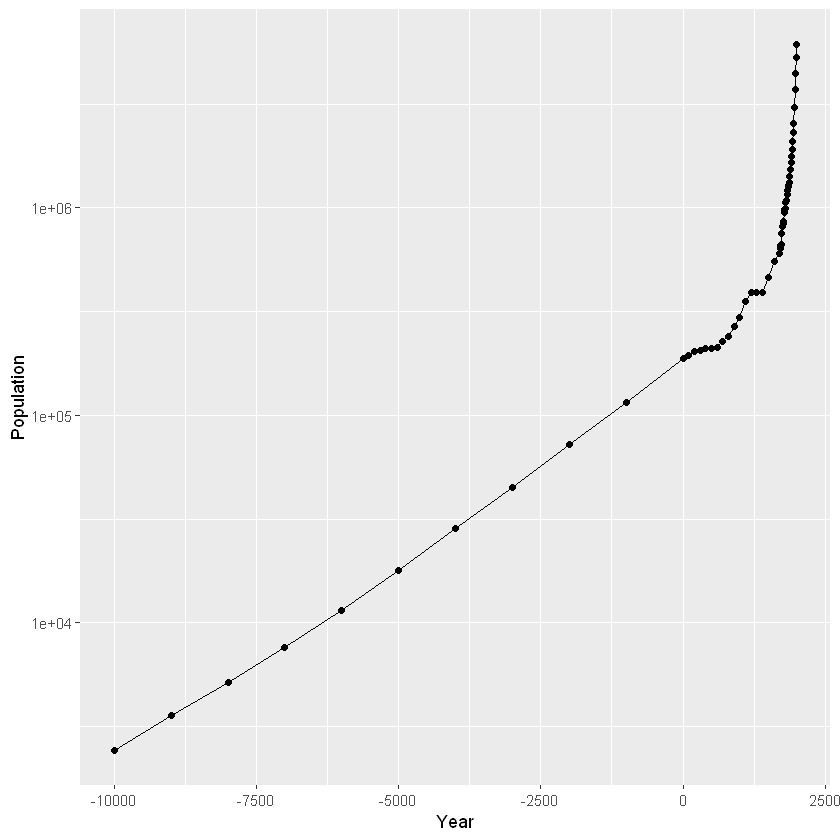

In [128]:
# linear하지 않은 변화에 대해서는 스케일이 안맞아
ggplot(worldpop, aes(x = Year, y = Population)) + geom_line() + geom_point() + scale_y_log10()